In [1]:
#Loading all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from scipy.io import loadmat

#Taking The Data Set
data=loadmat('ex7data2.mat')
X=data['X']
print("Shape of the Feature Matrix Is {}".format(X.shape))

Shape of the Feature Matrix Is (300, 2)


<function matplotlib.pyplot.plot(*args, **kwargs)>

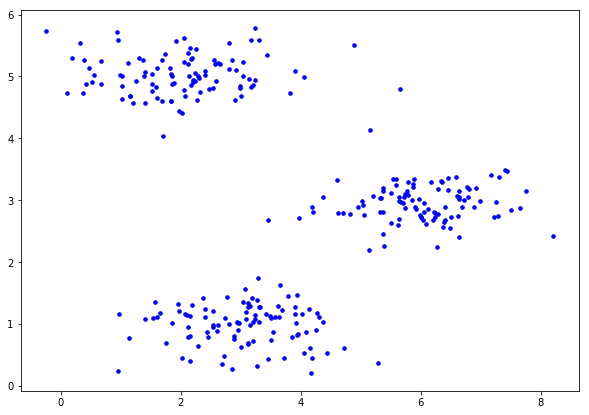

In [2]:
#Now plotting the given data
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], s=50, c='blue', marker='.')
plt.plot

In [3]:
#Now Implementing The K means algorithm
#Use k-means++ method for more optimized solution
from sklearn.cluster import KMeans
noOfClusters=3
method='random'
noOfIterations=30
epochs=3000
kM=KMeans(n_clusters=noOfClusters,init=method,n_init=noOfIterations,max_iter=epochs)

In [4]:
#Fitting the above K means to our problem
kM.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=3000,
    n_clusters=3, n_init=30, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

<function matplotlib.pyplot.plot(*args, **kwargs)>

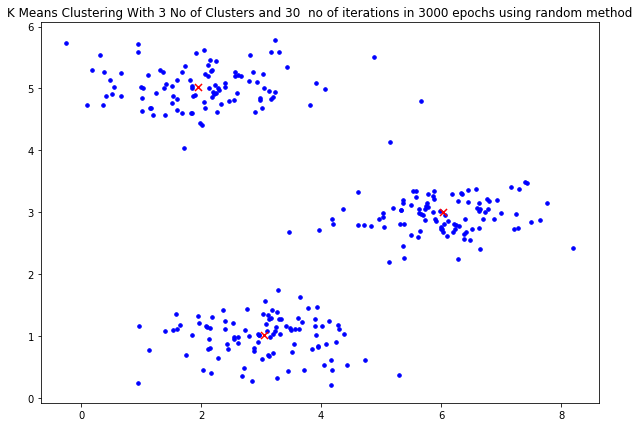

In [5]:
#Now Plotting Our K Means Prediction
plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1],s=50,c='blue',marker='.')
plt.title("K Means Clustering With {} No of Clusters and {}  no of iterations in {} epochs using {} method".format(noOfClusters,noOfIterations,epochs,method))
plt.scatter(kM.cluster_centers_[:,0],kM.cluster_centers_[:,1],s=50,c='red',marker='x')
plt.plot

In [6]:
#The Secondd part of the question
img = plt.imread('bird_small.png')
img_shape = img.shape
print("The  shape of the image is {}".format(img_shape))

The  shape of the image is (128, 128, 3)


In [7]:
A=img/255
X = A.reshape(128*128,3)
X.shape

(16384, 3)

In [8]:
noOfClusters=16
method='k-means++'
noOfIterations=30
epochs=3000
kMImage=KMeans(n_clusters=noOfClusters,init=method,n_init=noOfIterations,max_iter=epochs)

In [9]:
kMImage.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=3000,
    n_clusters=16, n_init=30, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
print("The cluster centers are : {} and {} the labels which we get are {}".format((kMImage.cluster_centers_[0]),(kMImage.cluster_centers_[1]),(kMImage.labels_)))

The cluster centers are : [0.00274645 0.00246678 0.00220726] and [0.00114393 0.00102121 0.00100397] the labels which we get are [5 5 5 ... 3 3 3]


In [11]:
#Now Printing The Image With The Greyscale resolution
#First making the image comeup in original shape of 128,128,3
greyScaleImage = kMImage.cluster_centers_[kMImage.labels_].reshape(img_shape[0], img_shape[1], 3)

Text(0.5,1,'Compressed, with 16 colors')

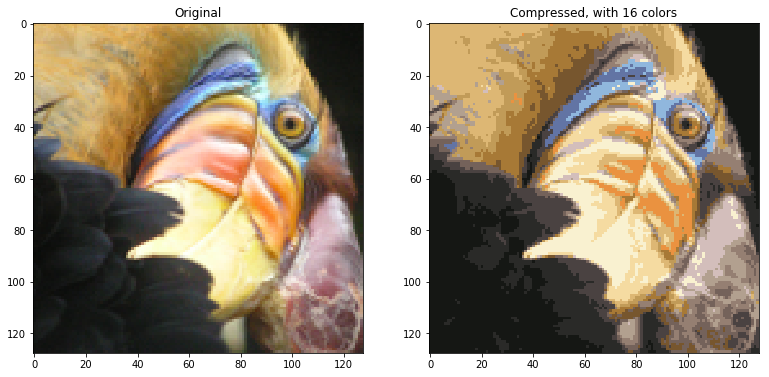

In [12]:
#Printing The Image
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,9))
ax1.imshow(img)
ax1.set_title('Original')
ax2.imshow(greyScaleImage*255)
ax2.set_title('Compressed, with {} colors'.format(noOfClusters))

In [13]:
#Third Part Of the excercise
#We will first load the data
data=loadmat('ex7data1')
X=data['X']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
print(X.shape)

(50, 2)


In [14]:
#Now applying SVD
from scipy import linalg
U, S, V = linalg.svd(scaler.transform(X).T)
print("The value of U is {} and the value of S is {}".format((U),(S)))

The value of U is [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]] and the value of S is [9.3153915  3.63641048]


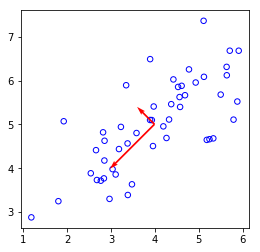

In [15]:
#Now applying PCA
plt.scatter(X[:,0], X[:,1], s=30, edgecolors='b',facecolors='None', linewidth=1);
# setting aspect ratio to 'equal' in order to show orthogonality of principal components in the plot
plt.gca().set_aspect('equal')
plt.quiver(scaler.mean_[0], scaler.mean_[1], U[0,0], U[0,1], scale=S[1], color='r')
plt.quiver(scaler.mean_[0], scaler.mean_[1], U[1,0], U[1,1], scale=S[0], color='r');